# Self-Organized Criticality


# 1. Scale invariance

In physics, mathematics, statistics, and economics, scale invariance is a feature of objects or laws that do not change if scales of length, energy, or other variables, are multiplied by a common factor, thus represent a universality.

- In mathematics, scale invariance usually refers to an invariance of individual functions or curves. A closely related concept is self-similarity, where a function or curve is invariant under a discrete subset of the dilatations. The Kotch curve (below) is an example of fractal, that are self-similarity curves.
- In statistical mechanics, scale invariance is a feature of phase transitions. The key observation is that near a phase transition or critical point, fluctuations occur at all length scales, and thus one should look for an explicitly scale-invariant theory to describe the phenomena.

![](img/Kochsim.gif)



# 2. Sandpile model

The Abelian sandpile model, also known as the Bak-Tang-Wiesenfeld model, was the first discovered example of a dynamical system displaying self-organized criticality.

The model is a cellular automaton. In its original formulation, each cell on a finite grid has an associated value that corresponds to the slope of the pile. This slope builds up as "grains of sand" (or "chips") are randomly placed onto the pile, until the slope exceeds a specific threshold value at which time that site collapses transferring sand into the adjacent sites, increasing their slope. There is a successive random placement of sand grains on the grid; each such placement of sand at a particular site may have no effect, or it may cause a cascading reaction that will affect many sites.

The original interest behind the model stemmed from the fact that in simulations on lattices, it is attracted to its critical state, at which point the correlation length of the system and the correlation time of the system go to infinity, without any fine tuning of a system parameter. This contrasts with earlier examples of critical phenomena, such as the phase transitions between solid and liquid, or liquid and gas, where the critical point can only be reached by precise tuning (e.g., of temperature). Hence, in the sandpile model we can say that the criticality is self-organized.

Once the sandpile model reaches its critical state there is no correlation between the system's response to a perturbation and the details of a perturbation. Generally this means that dropping another grain of sand onto the pile may cause nothing to happen, or it may cause the entire pile to collapse in a massive slide. The model also displays 1/ƒ noise, a feature common to many complex systems in nature.

## 2.1. Exercise

The example below displays a standard Abelian sandpile. You can see the distribution of the grains along time, how they expand from where they are dropped. Modify the parameteres in the code to explore some variations.

- The shape of the grain of rice is modellized by the threshold of the avalanches: Rounded grains stand smaller piles atop, as they easily slip from one to another. Elliptic grain stand higher piles because they are intertwined. In the code, modify the variable "maxGrains" at line 4. Observe how the extent and distribution of the grains is affected.
- The function "dropSand()" in line 62 manage how to drop a new grain of sand. Modify the code to throw the grains at several positions (center, border, corner, randomly) and observe the differences.


In [1]:
%%HTML
<iframe src="https://www.openprocessing.org/sketch/434784/embed/" width="450" height="510"></iframe>

# 2.2. Exercise

To analyse the results, we will code the sandpile algorithm. Every time a new grain is dropped at the center, this action may produce nothing, or may produce a displacement of several other grains. Sometimes, this displacement spreads all over the sandpile in a big avalanche that moves from the center to the border and backwards. The size of the avalanche for each new grain is the number of grains displaced by that grain.

The sandpile function returns the board containing the grains and the number of grains displaced on every time step. To save computation time, one time step means dropping the maximum number of grains allowed for a pile, as dropping less grains produces no avalanches.


In [23]:
import math
import numpy as np

# Algorithm of the Sandpile model 
def sandPileModel(size, numGrainsDropped, maxGrainsPerPile, probabilityFalldown):
    sizeBoard = size # size of the board (each pixel is a pile)
    board = np.zeros((sizeBoard+2,sizeBoard+2))

    # Grains fallen from a pile when it has more than maxGrainsPerPile
    grainsFallen = maxGrainsPerPile * probabilityFalldown;
    # Total grains displaced for every timestep. In each timestep we drop 'maxGrainsPerPile' grains.
    avalancheSize = np.zeros((math.floor(numGrainsDropped/maxGrainsPerPile),1))

    for i in range(len(avalancheSize)):
        grainsDisplaced = 0
        board[int(sizeBoard/2)+1,int(sizeBoard/2)+1] += maxGrainsPerPile    
        # run until a stable state is reached
        while np.max(board) >= maxGrainsPerPile:
            # find the highest piles
            toohigh = board >= maxGrainsPerPile
            grainsDisplaced += grainsFallen * np.sum(toohigh)

            # decrease highest piles
            board[toohigh] -= grainsFallen

            # increase adjacent piles
            board[1:,:][toohigh[:-1,:]] += grainsFallen / 4
            board[:-1,:][toohigh[1:,:]] += grainsFallen / 4
            board[:,1:][toohigh[:,:-1]] += grainsFallen / 4
            board[:,:-1][toohigh[:,1:]] += grainsFallen / 4

            # reset the overspill at the borders
            board[0:1,:] = 0
            board[1+sizeBoard:,:] = 0
            board[:,0:1] = 0
            board[:,1+sizeBoard:] = 0
        # Store the number of grains displaced
        avalancheSize[i] = grainsDisplaced

    # remove empty lines and columns
    board = board[1:1+sizeBoard,1:1+sizeBoard]
    board = [x for x in board if any(x)]
    board = np.transpose(board)
    board = [x for x in board if any(x)]
    board = np.transpose(board)

    return [board, avalancheSize]


Now, we will call the function with different parameters to analize the results. We will plot the resulting board, the size of avalanches in every timestep, and the histogram of those avalanches. The histogram let us know how many avalanches there has been with a certain size range.

- Sometimes, the linear scales of the plots are not convenient when the data vary logarithmically. In the code, look for the lines that switch the scales from linear to logarithmic and uncomment them. E.g.: ax.set_yscale('log')
- As well, the chronogram graph of the avalanches may show too many data. To display only a certain range of time, look for the commented line that set the limits of the horizontal axis and modify it to your convenience.
- Different types of grain (e.g. rounded or elliptical) may alter the number of grains that can stand in a pile before it falls down. Modify the value of the "MAX_GRAINS" variable to simulate different types of grain. Don't worry to break the grains in pieces to distribute them homogeneously among the adjacent piles. Are the results similar or different?
- Some grains may remain in the pile after the avalanche, so not falling down to its neighbours. We can simulate these cases with the "FALL_PROBABILITY" variable, whose values go from zero (no grains fall) and 1 (all the grains of the pile are distributed among the neighbours).

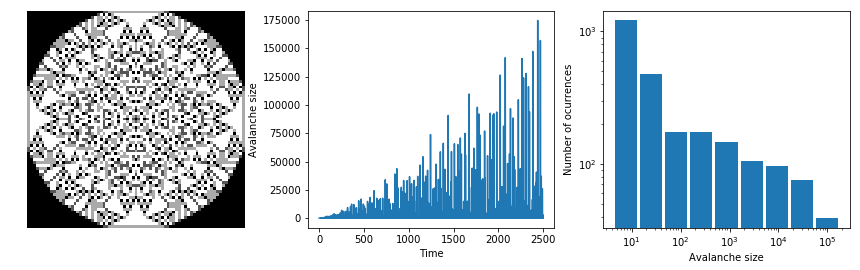

In [25]:
%matplotlib inline 
from matplotlib import pyplot as plt
    
# Width of the board (height is equal to width)
BOARD_SIZE = 100
# Maximum number of stackable sand grains that will cause an avalanche
MAX_GRAINS = 4
# Probablity of grains falling down to adjacent piles during an avalanche
FALL_PROBABILITY = 1
# Total number of grains dropped on the board
NUM_GRAINS = 10000
# Calculate the simulation
[board, avalancheSize] = sandPileModel(BOARD_SIZE, NUM_GRAINS, MAX_GRAINS, FALL_PROBABILITY)

# Figures
fig = plt.figure(figsize=(15,4))

# Sandpile boad
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(board / np.max(board), cmap='gray', vmin=0, vmax=1)

# Chronogram of avalanches
ax = plt.subplot(1,3,2)
plt.xlabel('Time')
plt.ylabel('Avalanche size')
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_xlim([max(0, len(avalancheSize)-300), len(avalancheSize)])
plt.plot(range(len(avalancheSize)), avalancheSize)

# Histogram of avalanches
ax = plt.subplot(1,3,3)
plt.xlabel('Avalanche size')
plt.ylabel('Number of ocurrences')
#plt.hist(avalancheSize, bins=np.linspace(0,max(avalancheSize),num=10), rwidth=0.9)
ax.set_xscale('log')
ax.set_yscale('log')
plt.hist(avalancheSize, bins=np.logspace(np.log10(MAX_GRAINS),np.log10(max(avalancheSize)),num=10), rwidth=0.9)

plt.show()

# 3. Bak-Sneppen model

The Bak–Sneppen model is a simple model of co-evolution between interacting species. It was developed to show how self-organized criticality may explain key features of the fossil record, such as the distribution of sizes of extinction events and the phenomenon of punctuated equilibrium.

The model dynamics repeatedly eliminates the least adapted species and mutates it and its neighbors to recreate the interaction between species. We consider N species, which are associated with a fitness factor f(i). They are indexed by integers i around a ring. The algorithm consists in choosing the least fit species, and then replacing it and its two closest neighbors (previous and next species) by new species, with a new random fitness. After a long run there will be a minimum required fitness, below which species don't survive. These "long-run" events are referred to as avalanches, and the model proceeds through these avalanches until it reaches a state of relative stability where all species' fitness are above a certain threshold.

As well, we can use this model to study the scientific progress. Accounts of scientific change roughly fall into two categories, one and two-process change. One-process views hold that scientific change is a single process of movement toward an independent point of reference, for example Popper's cycle of conjecture and refutation. One of the most influential criticisms of this view is by Thomas Kuhn, who held that standards for science are not independent, but coevolve with scientific activity itself. Science then does not evolve toward a goal but away from goals previously set, with no fixed point left to compare its progress against. Without such a stable ‘‘Archimedean platform,’’ there is nothing against which science can meaningfully be said to cumulate. Moreover, changes of standard caused by scientific change can cause cascades of further scientific changes. 

![](img/Scientific-progress-popperian.png)
![](img/Scientific-progress-kuhnian.png)


## 3.1. Exercise

This example displays the Bak-Sneppel model. Every column represents one specie. As the species become older, their color change from light green to dark blue. When a specie has the least fitness, it is eliminated along its neighbours, so new species are created with their age restarted to zero and changing their colors to light green. 

We can modify the original parameters to analyse their effect on the extinction avalanches. Go to OpenProcessing code and, in the "BS" tab, modify:

- The number of eliminated neighbours, i.e. the variable "neighbourSize". Originally it is two neighbours, the specie at left and the specie at the right, but we may apply a wider extinction to more neighbours.
- The probability of extinction, i.e .the variable "neighbourProb". Originally, the neighbours are certainly eliminated with a probability of one over one, meaning that the neighbour species are totally dependant of its neighbour. But we may choose a difffernt probability for devolping a more realistic interdependence. You can change this variable from zero (independent species) to one (fully dependant species).


In [4]:
%%HTML
<iframe src="https://www.openprocessing.org/sketch/434390/embed/" width="500" height="400"></iframe>

# 3.2. Exercise

To analyse the Bak-Sneppen model, we will perform some calculations on Python. Take a look at the code and try to understand the steps.


In [2]:
import math
import numpy as np

# Bak-Sneppen algorithm
def bak_sneppen(N, maxGenerations, neighbourSize, neighbourProb):
    agesSize = 300
    ages      = np.zeros(N)
    agesStart = np.zeros((agesSize, N))
    agesEnd   = np.zeros((agesSize, N))
    x = np.zeros(maxGenerations)
    f = np.random.rand(N)
    p1 = 1
    # Iterate on generations
    for t in range(maxGenerations):
        ages= ages + 1
        # Search for the specie with least fitness
        ind = np.argmin(f)
        # Randomly disposal of the least fitness specie and its neighbours
        if np.random.rand(1)<p1:
            f[ind]=np.random.rand(1)
            ages[ind] = 0
            for d in range(1,1+math.floor(neighbourSize/2)):
                if np.random.rand(1) < neighbourProb:
                    f[(ind+d)%N] = np.random.rand(1)
                    ages[(ind+d)%N] = 0
                if np.random.rand(1) < neighbourProb:
                    f[(ind-d)%N] = np.random.rand(1)
                    ages[(ind+d)%N] = 0
        x[t]=np.mean(f)
        # Store the values of firsts generations
        if t<agesSize:
            for iCell in range(N):
                agesStart[t, iCell] = ages[iCell]
        # Store the values of lasts generations
        if maxGenerations-t<agesSize:
            for iCell in range(N):
                agesEnd[t-maxGenerations, iCell] = ages[iCell]
    return [x, agesStart, agesEnd]


The example below plots the mean fitness in a chronogram. At first, this number will grow along time because the least fitness specie is eliminated on each generation. As time goes by, an increasingly random growth is expected because old species will have an almost constant high value of fitness while the new species are introduced with random fitness.

- Modify the number of eliminated neighbours and their probability of being eliminated, and analyse the rise of the mean fitness along time according the modifications.
- For better visualizations, try to display the graphs on logarithmic scale.

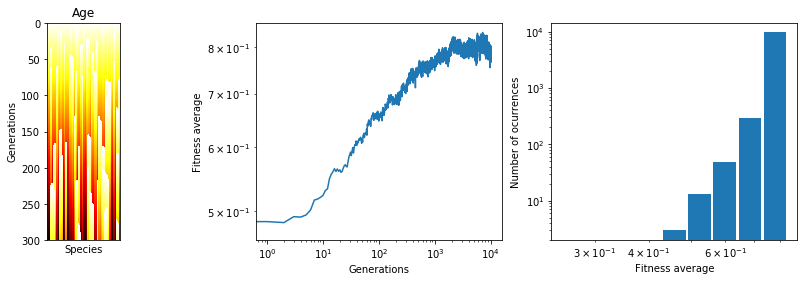

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt

N              = 100 # Number of cells in one generation
maxGenerations = 10000 # Calculate up to this maximum number of generations
neighbourSize  = 2 # Number (even) of eliminated neighbours (2 = left and right neighbours)
neighbourProb  = 1 # Probability of the neighbours to be eliminated (0 < neighbourProb < 1)

# Calculate the simulation
[agesEliminated, agesStart, agesEnd] = bak_sneppen(N, maxGenerations, neighbourSize, neighbourProb)
agesImage = agesStart

# Figures
plt.figure(figsize=(15,4))

# Ages of the eliminated specie
ax = plt.subplot(1,3,1)
plt.title('Age')
plt.xlabel('Species')
plt.ylabel('Generations')
ax.set_xticks([])
plt.imshow(agesImage / np.max(agesImage), cmap='hot_r', vmin=0, vmax=1)

# Chronogram
ax = plt.subplot(1,3,2)
plt.xlabel('Generations')
plt.ylabel('Fitness average')
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(range(len(agesEliminated)), agesEliminated)

# Histogram
ax = plt.subplot(1,3,3)
plt.xlabel('Fitness average')
plt.ylabel('Number of ocurrences')
#plt.hist(agesEliminated, bins=np.linspace(1e-4,max(agesEliminated),num=10), rwidth=0.9)
plt.hist(agesEliminated, bins=np.logspace(-0.6, np.log10(max(agesEliminated)),num=10), rwidth=0.9)
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

# 4. Detrended Fluctuaction Analysis

A fractal dimension is a ratio providing a statistical index of complexity comparing how detail in a pattern (strictly speaking, a fractal pattern) changes with the scale at which it is measured. It has also been characterized as a measure of the space-filling capacity of a pattern that tells how a fractal scales differently from the space it is embedded in; a fractal dimension does not have to be an integer.

For instance, if we measure the lenght of the England coast, we will find different values according the unit chosen to do the measurement.

![](img/box-counting.png)

We may apply the fractal ideas to time signals. For instance, the box counting method would consist in covering with boxes the line of the signal when the value of the signal is displayed along time.

There are several algorithms that measure the fractal index of time signals. We are going to use the DFA (Detrended Fluctuation Analysis) because its robustness.

On time-signals, there are three chracteristic fractal values: white, pink and brown noise.
- White noise is produced when the value of the signal at every moment is fully independent from the previous values.
- Brown noise is the mathematical integrtion of white noise. For instance, consider a random walk: at every moment, the direction of the next step is random, but the result is a path along space. So the value of the signal at a certain moment is very dependant of the previous values.
- Pink noise is in between white and brown noises. There are many phenomena at nature which signature is pink noise, exhibiting a self-organized structure, critical in the sense of being at the border between rigidness and randomness.


## 4.1. Exercise
Now, we will analyse the results of the sandpile model to check if they are fractal. To do so, we will obtain the fractal index of the avalanche size.
- Does the sandpile model have a fractal behaviour?
- Modify the parameters of the sandpile model, i.e. MAX_GRAINS and FALL_PROBABILITY, and relate the changes to the fractal index.

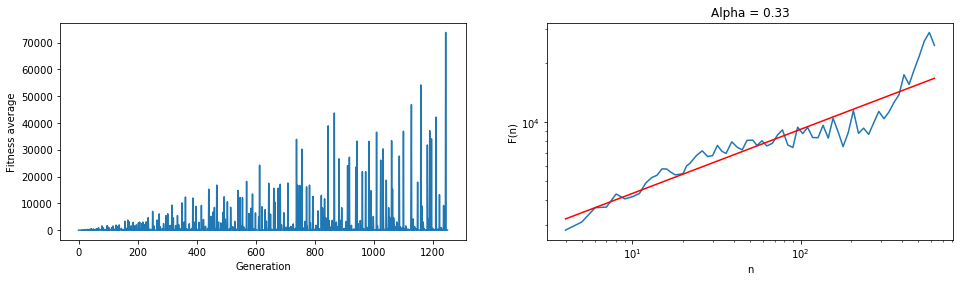

In [34]:
from pyeeg import dfa as dfa
import numpy as np

def plot_dfa(x, cut, step, Nfit):
    ix = np.arange(np.log2(len(x)/2), cut, -step)
    n = np.round(2**ix)
    [alpha, n, F] = dfa(x, L=n)
    index = int(len(n)-Nfit)
    P = np.polyfit(np.log(n[index:]),np.log(F[index:]), 1)
    plt.title("Alpha = {:0.2f}".format(alpha))
    plt.xlabel('n')
    plt.ylabel('F(n)')
    plt.loglog(n, F)
    plt.loglog(n[index:], np.power(n[index:], P[0])*np.exp(P[1]), 'r')
    return [alpha, n, F]

# Width of the board (height is equal to width)
BOARD_SIZE = 100
# Maximum number of stackable sand grains that will cause an avalanche
MAX_GRAINS = 4
# Probablity of grains falling down to adjacent piles during an avalanche
FALL_PROBABILITY = 1
# Total number of grains dropped on the board
NUM_GRAINS = 5000
# Figure size
plt.figure(figsize=(16, 4), dpi=72)

# Calculate the simulation
[board, avalancheSize] = sandPileModel(BOARD_SIZE, NUM_GRAINS, MAX_GRAINS, FALL_PROBABILITY)
plt.subplot(1,2,1)
plt.xlabel('Generation')
plt.ylabel('Fitness average')
plt.plot(avalancheSize)

# Calculate the fractal index
plt.subplot(1,2,2)
cut=2
step=0.1
[alpha, n, F] = plot_dfa(avalancheSize, cut, step, len(avalancheSize))


## 4.2. Exercise
Now, we will analyse the results of the Bak-Sneppen model to check if they are fractal. To do so, we will obtain the fractal index of the avalanche size.
- Does the Bak-Sneppen model have a fractal behaviour?
- Modify the parameters of the model, i.e. the neighbourSize and neighbourProb variables, and relate the changes to the fractal index.
- Tip: The maxGenerations value cannot be small because the DFA algorithm needs a long serie to accurately perform the calculations.

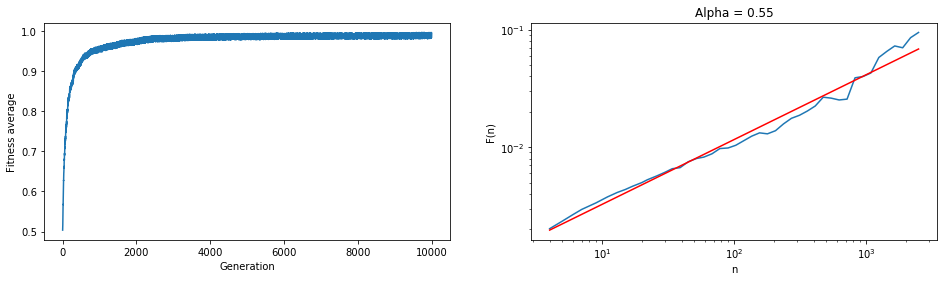

In [32]:
from pyeeg import dfa as dfa
import numpy as np
import math    

N              = 64 # Number of cells in one generation
maxGenerations = 10000 # Calculate up to this maximum number of generations
neighbourSize  = 2 # Number (even) of eliminated neighbours (2 = left and right neighbours)
neighbourProb  = 0 # Probability of the neighbours to be eliminated (0 < neighbourProb < 1)
# Figure size
plt.figure(figsize=(16, 4), dpi=72)

# Calculate the simulation
[meanFitness, agesStart, agesEnd] = bak_sneppen(N, maxGenerations, neighbourSize, neighbourProb)
plt.subplot(1,2,1)
plt.xlabel('Generation')
plt.ylabel('Fitness average')
plt.plot(meanFitness)

# Calculate the fractal index
plt.subplot(1,2,2)
[alpha, n, F] = plot_dfa(meanFitness[int(maxGenerations/2):], 2, 0.2, maxGenerations/5)



# References
- Wikipedia. [Bak–Sneppen model](https://en.wikipedia.org/wiki/Bak%E2%80%93Sneppen_model)
- Wikipedia. [Minkowski–Bouligand dimension](https://en.wikipedia.org/wiki/Minkowski%E2%80%93Bouligand_dimension)
- Wikipedia. [Sandpile](https://en.wikipedia.org/wiki/Abelian_sandpile_model)
- Wikipedia. [Scale invariance](https://en.wikipedia.org/wiki/Scale_invariance)